<a href="https://colab.research.google.com/github/cdcmx2020a/groupA_Jose/blob/master/networkx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo para uso de `Networkx`
![texto alternativo](https://networkx.github.io/_static/networkx_logo.svg)

# En este ejemplo, vamos a usar esta librería para formar un grafo de un conjunto de puntos aleatorios que tienen conecciones entre ellos.

## Invocamos a `networkx` de la forma usual dandole el alias nx:

In [1]:
import networkx as nx

# Con el atributo `Graph`, inicializamos el grafo. Luego podemos ir estableciendo los enlaces para ir creciendo el grafo. El atributo add_edge permite agregar un nuevo enlace entre un par de nodos. Por ejemplo `G.add_edge('0','1')` crea un enlace entre el nodo `'0'` y el `'1'`.

In [2]:


G = nx.Graph()
#G.add_edge('0','1')
#G.add_edge('1','2')
#G.add_edge('1','3')
#G.add_edge('2','0')
#G.add_edge('0','3')
#G.add_edge('1','4')
#G.add_edge('5','0')
#G.add_edge('5','1')
#G.add_edge('4','0')
#G.add_edge('2','3')

print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 0 nodes.
We have 0 edges.


In [3]:
from scipy.spatial.distance import cdist

# En este caso, `G` es un grafo de 6 nodos (desde el nodo `'0'` hasta el nodo '5'). 

#Ya estamos en posibilidad de visualizar el gráfo, para lo que nos apoyamos de `matplotlib`:

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

np.random.seed(9719)
N=6
x = np.random.uniform(20,30, size=(N, ))
y = np.random.uniform(20,30, size=(N, ))

In [6]:
xy=np.array(list(zip(x,y)))

In [7]:
distancias = cdist(xy, xy, 'euclidean')

In [8]:
import pandas as pd
distancias_df=pd.DataFrame(data=distancias)

In [9]:
def vecinos(df,r,i):
  return df[df[i] < r][i]

In [10]:
pares=[]
radio=7
for i in np.arange(N):
  vec_serie=vecinos(distancias_df,radio,i)
  lista=(list(vec_serie.index.values)) 
  for p in lista:
    if (p != i):
      pares.append([i,p])
#      print(i,p)

In [11]:
pares

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [1, 0],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 5],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 5],
 [5, 0],
 [5, 1],
 [5, 3],
 [5, 4]]

In [12]:
for par in pares:
  G.add_edge(str(par[0]),str(par[1]))

# Las posiciones de los nodos se pueden generar usando diferentes algoritmos, uno muy popular es dado por `kamada_kawai_layout`, aunque en este caso, las posiciones no tienen un significado real, solo son para representar el grafo.

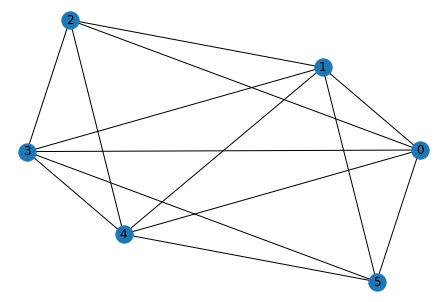

In [13]:

pos = nx.kamada_kawai_layout(G) 
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [14]:
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 6 nodes.
We have 14 edges.


#Sin embargo, en nuestro caso, nos conviene que esos nodos representen coordenadas, por lo que asignaremos las posiciones de esa manera.

#Vamos a generar las coordenadas de forma aleatoria como ya lo hemos hecho antes, pero ahora la guardaremos en un diccionario que tendrá este formato:



```
# diccio={'nodo 0':[x0,y0],'nodo 1':[x1,y1],...}
```

## o sea, tiene la información de las coordenadas `x` y `y` de cada nodo.



## Pon atención a los comentarios en este código!!!

In [15]:
diccio={} # inicializamos el diccionario

for i in np.arange(6):
  diccio[str(i)]=np.array([x[i],y[i]])#np.random.uniform(20,30, size=(2, )) # qué significa esta línea?? --> ve el resultado
  

print(diccio)

{'0': array([27.41936059, 26.77304052]), '1': array([24.97031832, 24.25225898]), '2': array([21.84010497, 22.75428058]), '3': array([24.42620078, 26.40254489]), '4': array([27.0433201 , 24.73920221]), '5': array([29.33046119, 21.97937424])}


## ahora, podemos asociar al atributo pos el diccionario que acabamos de crear y con eso el grafo tendrá la forma dada por las posiciones.

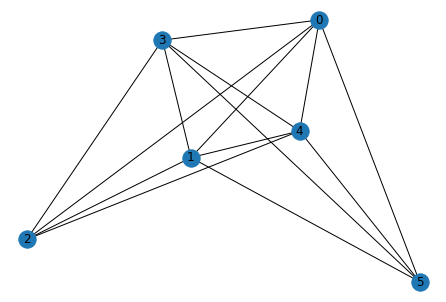

In [16]:
pos=diccio
nx.draw(G,pos=pos,with_labels=True)
plt.show()

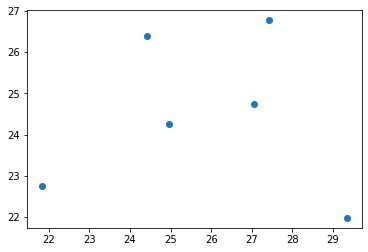

In [17]:
plt.scatter(x,y)

In [18]:
import plotly.express as px
fig = px.scatter(x=x,y=y,hover_data=[distancias_df.index])
fig.show()